In [2]:
import pandas as pd
import numpy as np

1. **Data File** : Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv

In [3]:
#from shareable drive link
url='https://drive.google.com/file/d/1bB1jVrHcQPLB7UQBDLJWV9lNhHX3Hsbd/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
saudi_data = pd.read_csv(url)

In [4]:
saudi_data.head()
# saudi_data.info()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0


In [5]:
saudi_data.columns

Index(['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1', 'Region',
       'Family member with ASD history', 'Who is completing the test', 'Age',
       'Gender', 'Screening Score', 'Class'],
      dtype='object')

In [6]:
saudi_data.rename(columns={'Family member with ASD history':'familyHistory', 'Who is completing the test':'testAdmin','Class':'ASD','Screening Score':'screeningScore' }, inplace=True)

In [7]:
saudi_data['Country']='Saudi Arabia'
saudi_data.drop('Region',axis=1, inplace=True)
saudi_data['Source'] = 'Kaggle-Saudi Arabia'
saudi_data['Ethnicity']='Middle Eastern' #Here assumption is made about ethnicity from majority of population of Saudi Arabia

In [8]:
saudi_data['testAdmin'].unique()

array(['Family member', 'Other'], dtype=object)

In [9]:
saudi_data.testAdmin = saudi_data.testAdmin.str.title()

In [10]:
saudi_data.replace({'Male':0,'Female':1,'No':0,'Yes':1}, inplace=True)

In [11]:
saudi_data.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,testAdmin,Age,Gender,screeningScore,ASD,Country,Source,Ethnicity
0,0,0,1,1,1,0,0,0,0,0,0,Family Member,32,1,3,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern
1,0,0,1,0,0,1,0,1,0,0,0,Family Member,30,1,3,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern
2,0,0,0,1,0,0,0,0,0,0,0,Family Member,36,0,1,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern
3,0,0,0,0,0,0,0,0,0,0,1,Family Member,36,1,0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern
4,0,0,0,0,0,0,0,0,0,0,0,Family Member,36,1,0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern


In [12]:
num = ['Age', 'screeningScore']
cat = ['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1','familyHistory','Gender','testAdmin','Country','Ethnicity','ASD']

In [13]:
saudi_data[num].describe()

,Age,screeningScore
count,506.000000,506.000000
mean,24.448617,5.490119
std,8.344461,3.181771
min,12.000000,0.000000
25%,17.000000,3.000000
50%,24.000000,6.000000
75%,33.000000,8.000000
max,36.000000,10.000000


In [14]:
saudi_data[cat] = saudi_data[cat].astype('category')

In [15]:
saudi_data[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Country,Ethnicity,ASD
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,1,1,1,1,1,1,1,1,0,1,0,1,Family Member,Saudi Arabia,Middle Eastern,1
freq,314,275,291,280,278,283,266,259,259,285,384,349,413,506,506,341


2. **Data File**  : Autism-Adolescent-Data.csv

In [16]:
#from shareable drive link
url='https://drive.google.com/file/d/165cVhj9SMkuD4lCrA1AyvZ5-_W-IwK-x/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
adolescent = pd.read_csv(url)

In [17]:
adolescent.head()
# adolescent.info()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,?,no,no,AmericanSamoa,no,2,'12-16 years',?,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,?,no,no,Albania,no,7,'12-16 years',?,YES


In [18]:
adolescent.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [19]:
columns = {'A1_Score':'A1', 'A2_Score':'A2', 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5', 'A6_Score':'A6',
           'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10','age':'Age','gender':'Gender','ethnicity':'Ethnicity',
           'jundice':'Jaundice', 'austim':'familyHistory', 'contry_of_res':'Country','result':'screeningScore', 'relation':'testAdmin',
           'Class/ASD':'ASD'}

In [20]:
to_drop =['used_app_before','age_desc']
adolescent.drop(to_drop, axis=1, inplace=True)

In [21]:
adolescent.rename(columns=columns, inplace=True)

In [22]:
adolescent.Ethnicity.unique()

array(['Hispanic', 'Black', '?', 'White-European', "'Middle Eastern '",
       "'South Asian'", 'Others', 'Latino', 'Asian'], dtype=object)

In [23]:
adolescent.Country.unique()

array(['Austria', 'AmericanSamoa', "'United Kingdom'", 'Albania',
       'Belgium', 'Afghanistan', 'Australia', 'Bahrain', 'Azerbaijan',
       "'United Arab Emirates'", "'New Zealand'", "'United States'",
       'Argentina', 'Jordan', 'Canada', 'Brazil', 'Croatia', 'India',
       'Bangladesh', 'France', 'Indonesia', 'Egypt', 'Netherlands',
       'Greenland', 'Bahamas', "'South Africa'", "'Viet Nam'", 'Comoros',
       'Portugal', 'Finland', 'Norway', 'Ireland', 'Anguilla'],
      dtype=object)

In [24]:
adolescent.testAdmin.unique()

array(['Parent', 'Relative', '?', 'Self', "'Health care professional'",
       'Others'], dtype=object)

In [25]:
adolescent['Source']='UCI-Adolescent'
adolescent.Country = adolescent.Country.str.strip('\'').str.title()
adolescent.Ethnicity = adolescent.Ethnicity.str.strip('\'').str.replace('-',' ').str.title()
adolescent.testAdmin = adolescent.testAdmin.str.strip('\'').str.title()
adolescent.replace({'no':0,'yes':1,'?':np.nan,'m':0,'f':1,'Viet Nam':'Vietnam','NO':0,'YES':1}, inplace=True)

In [26]:
adolescent.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Gender,Ethnicity,Jaundice,familyHistory,Country,screeningScore,testAdmin,ASD,Source
0,0,0,0,1,1,1,1,1,1,0,15,0,Hispanic,1,1,Austria,6,Parent,0,UCI-Adolescent
1,0,0,0,0,0,0,0,0,1,1,15,0,Black,0,0,Austria,2,Relative,0,UCI-Adolescent
2,0,0,0,0,0,0,0,0,1,1,12,1,NaN,0,0,Americansamoa,2,NaN,0,UCI-Adolescent
3,0,1,1,1,1,1,0,1,1,0,14,1,White European,0,0,United Kingdom,7,Self,1,UCI-Adolescent
4,1,1,1,1,1,1,1,0,0,0,16,1,NaN,0,0,Albania,7,NaN,1,UCI-Adolescent


In [27]:
adolescent[num].describe()

,Age,screeningScore
count,104.000000,104.000000
mean,14.134615,6.721154
std,1.576882,2.200868
min,12.000000,1.000000
25%,13.000000,6.000000
50%,14.000000,7.000000
75%,16.000000,8.000000
max,16.000000,10.000000


In [28]:
cat.append('Jaundice')
adolescent[cat] = adolescent[cat].astype('category')

In [29]:
adolescent[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Country,Ethnicity,ASD,Jaundice
count,104,104,104,104,104,104,104,104,104,104,104,104,98,104,98,104,104
unique,2,2,2,2,2,2,2,2,2,2,2,2,5,33,8,2,2
top,1,1,1,1,1,1,1,1,1,1,0,1,Self,United Kingdom,White European,1,0
freq,68,82,64,54,80,78,73,68,56,76,90,54,45,29,40,63,88


3. **Data File** : Autism-Adult-Data.csv

In [30]:
#from shareable drive link
url='https://drive.google.com/file/d/15zWmaLVQ0nRKSiGCH6rsXNX6IhoENjfX/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
adult = pd.read_csv(url)

In [31]:
# adult.head()
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [32]:
adult.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [33]:
to_drop =['used_app_before','age_desc']
adult.drop(to_drop, axis=1, inplace=True)

In [34]:
adult.rename(columns=columns, inplace=True)

In [35]:
adult['Source']='UCI-Adult'
adult.Country = adult.Country.str.strip('\'').str.title()
adult.Ethnicity = adult.Ethnicity.str.strip('\'').str.replace('-',' ').str.title()
adult.testAdmin = adult.testAdmin.str.strip('\'').str.title()
adult.replace({'no':0,'yes':1,'?':np.nan,'m':0,'f':1,'Viet Nam':'Vietnam','NO':0,'YES':1}, inplace=True)
adult.Age = adult.Age.apply(pd.to_numeric)

In [36]:
adult.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Gender,Ethnicity,Jaundice,familyHistory,Country,screeningScore,testAdmin,ASD,Source
0,1,1,1,1,0,0,1,1,0,0,26.0,1,White European,0,0,United States,6,Self,0,UCI-Adult
1,1,1,0,1,0,0,0,1,0,1,24.0,0,Latino,0,1,Brazil,5,Self,0,UCI-Adult
2,1,1,0,1,1,0,1,1,1,1,27.0,0,Latino,1,1,Spain,8,Parent,1,UCI-Adult
3,1,1,0,1,0,0,1,1,0,1,35.0,1,White European,0,1,United States,6,Self,0,UCI-Adult
4,1,0,0,0,0,0,0,1,0,0,40.0,1,NaN,0,0,Egypt,2,NaN,0,UCI-Adult


In [37]:
adult[num].describe()

,Age,screeningScore
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


<AxesSubplot: >

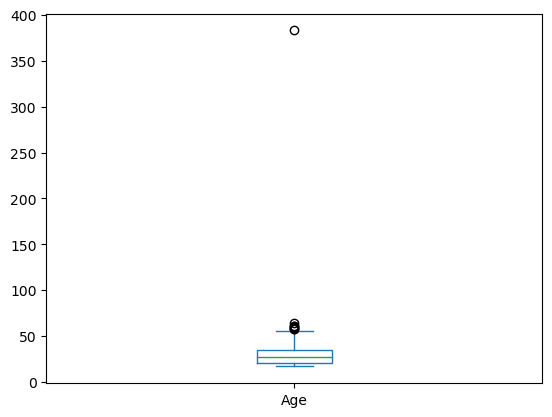

In [38]:
adult.Age.plot.box()

In [39]:
adult = adult[adult.Age<100]

<AxesSubplot: >

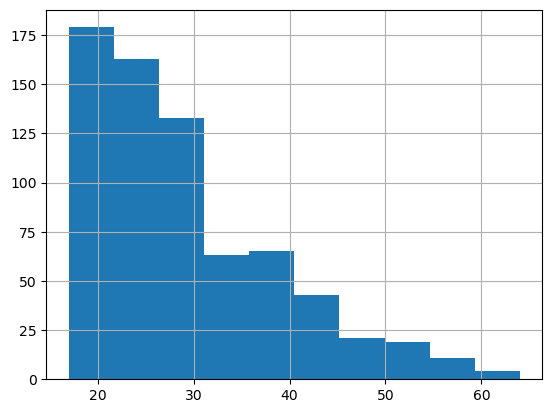

In [40]:
adult.Age.hist()

In [41]:
adult[cat] = adult[cat].astype('category')

In [42]:
adult[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Country,Ethnicity,ASD,Jaundice
count,701,701,701,701,701,701,701,701,701,701,701,701,608,701,608,701,701
unique,2,2,2,2,2,2,2,2,2,2,2,2,5,67,10,2,2
top,1,0,1,0,0,0,0,0,0,1,0,0,Self,United States,White European,0,0
freq,403,473,457,408,501,351,352,379,383,507,610,366,521,113,233,512,632


4. **Data File** : Autism-Child-Data.csv

In [43]:
#from shareable drive link
url='https://drive.google.com/file/d/15zTMXixH42iKd7_hiD9kZzndQNJ2sEjA/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
child = pd.read_csv(url)

In [44]:
child.head()
# child.info()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [45]:
child.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [46]:
to_drop =['used_app_before','age_desc']
child.drop(to_drop, axis=1, inplace=True)

In [47]:
child.rename(columns=columns, inplace=True)

In [48]:
child['Source']='UCI-Child'
child.Country = child.Country.str.strip('\'').str.title()
child.Ethnicity = child.Ethnicity.str.strip('\'').str.replace('-',' ').str.title()
child.testAdmin = child.testAdmin.str.strip('\'').str.title()
child.replace({'no':0,'yes':1,'?':np.nan,'m':0,'f':1,'Viet Nam':'Vietnam','NO':0,'YES':1}, inplace=True)
child.Age = child.Age.apply(pd.to_numeric)

In [49]:
child.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Gender,Ethnicity,Jaundice,familyHistory,Country,screeningScore,testAdmin,ASD,Source
0,1,1,0,0,1,1,0,1,0,0,6.0,0,Others,0,0,Jordan,5,Parent,0,UCI-Child
1,1,1,0,0,1,1,0,1,0,0,6.0,0,Middle Eastern,0,0,Jordan,5,Parent,0,UCI-Child
2,1,1,0,0,0,1,1,1,0,0,6.0,0,NaN,0,0,Jordan,5,NaN,0,UCI-Child
3,0,1,0,0,1,1,0,0,0,1,5.0,1,NaN,1,0,Jordan,4,NaN,0,UCI-Child
4,1,1,1,1,1,1,1,1,1,1,5.0,0,Others,1,0,United States,10,Parent,1,UCI-Child


In [50]:
child[num].describe()

,Age,screeningScore
count,288.000000,292.000000
mean,6.354167,6.239726
std,2.365456,2.284882
min,4.000000,0.000000
25%,4.000000,5.000000
50%,6.000000,6.000000
75%,8.000000,8.000000
max,11.000000,10.000000


In [51]:
child[cat] = child[cat].astype('category')

In [52]:
child[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Country,Ethnicity,ASD,Jaundice
count,292,292,292,292,292,292,292,292,292,292,292,292,249,292,249,292,292
unique,2,2,2,2,2,2,2,2,2,2,2,2,4,52,10,2,2
top,1,0,0,1,1,1,1,1,1,1,0,0,Parent,United Kingdom,White European,0,0
freq,212,148,147,177,208,217,161,217,156,185,243,208,214,49,108,151,212


5. **Data File** : data_analytics_model_on_behavioural_challenges_of_asd_kids.csv

In [104]:
#from shareable drive link
url='https://drive.google.com/file/d/16Gg_ms9hD4wIIZO1yM7byRN79XdrtlxK/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
behavioural = pd.read_csv(url)

In [105]:
behavioural.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [55]:
behavioural.rename(columns = {'A10_Autism_Spectrum_Quotient':'A10','Qchat_10_Score':'screeningScore','Age_Years':'Age','Sex':'Gender',
                    'Family_mem_with_ASD':'familyHistory','Who_completed_the_test':'testAdmin','ASD_traits':'ASD'}, inplace=True)                    

In [56]:
to_drop = ['CASE_NO_PATIENT\'S','Social_Responsiveness_Scale', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder']
behavioural.drop(to_drop, axis=1, inplace=True)


In [57]:
behavioural.head()
# behavioural.info()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,screeningScore,Gender,Ethnicity,Jaundice,familyHistory,testAdmin,ASD
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [58]:
behavioural.replace({'No':0,'Yes':1,'M':0,'F':1}, inplace=True)

In [59]:
behavioural['Source']='Github-Behavioural'

In [60]:
behavioural.Ethnicity.unique()

array(['middle eastern', 'White European', 'Middle Eastern', 'Hispanic',
       'Black', 'Asian', 'South Asian', 'Native Indian', 'Others',
       'black', 'asian', 'Latino', 'Mixed', 'south asian', 'mixed',
       'PaciFica'], dtype=object)

In [61]:
behavioural.Ethnicity = behavioural.Ethnicity.str.title()

In [62]:
behavioural.Ethnicity.unique()

array(['Middle Eastern', 'White European', 'Hispanic', 'Black', 'Asian',
       'South Asian', 'Native Indian', 'Others', 'Latino', 'Mixed',
       'Pacifica'], dtype=object)

In [63]:
behavioural.testAdmin.unique()

array(['Family Member', 'Health Care Professional', 'Self',
       'Family member', 'Others', 'School and NGO'], dtype=object)

In [64]:
behavioural.testAdmin = behavioural.testAdmin.str.title()

In [65]:
behavioural.testAdmin.unique()

array(['Family Member', 'Health Care Professional', 'Self', 'Others',
       'School And Ngo'], dtype=object)

In [66]:
behavioural.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,screeningScore,Gender,Ethnicity,Jaundice,familyHistory,testAdmin,ASD,Source
0,0,0,0,0,0,0,1,1,0,1,2,3.0,1,Middle Eastern,1,0,Family Member,0,Github-Behavioural
1,1,1,0,0,0,1,1,0,0,0,3,4.0,0,White European,1,0,Family Member,1,Github-Behavioural
2,1,0,0,0,0,0,1,1,0,1,3,4.0,0,Middle Eastern,1,0,Family Member,1,Github-Behavioural
3,1,1,1,1,1,1,1,1,1,1,2,10.0,0,Hispanic,0,0,Family Member,1,Github-Behavioural
4,1,1,0,1,1,1,1,1,1,1,2,9.0,1,White European,0,0,Family Member,1,Github-Behavioural


In [67]:
behavioural[num].describe()

,Age,screeningScore
count,1985.000000,1946.000000
mean,9.624685,4.234841
std,4.302416,2.898247
min,1.000000,0.000000
25%,7.000000,2.000000
50%,9.000000,4.000000
75%,14.000000,6.000000
max,18.000000,10.000000


In [68]:
cat.remove('Country')
behavioural[cat] = behavioural[cat].astype('category')

In [69]:
behavioural[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Ethnicity,ASD,Jaundice
count,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985,1985
unique,2,2,2,2,2,2,2,2,2,2,2,2,5,11,2,2
top,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Professional,Asian,1,1
freq,1099,1469,1501,1300,1377,1432,1445,1562,1512,1391,1330,1447,1233,605,1074,1536


5.1.1 **Data File** : data_csv.csv *[This is same as the data file above]*

```  Python
#from shareable drive link  
url='https://drive.google.com/file/d/1RZk1ubjRo6b0o-PMCAnYMyOMGjF7Bz7j/view?usp=share_link'  
url='https://drive.google.com/uc?id=' + url.split('/')[-2]  
data_csv = pd.read_csv(url)  
data_csv.info()  
```

6. **Data File** : Toddler Autism dataset July 2018.csv

In [70]:
#from shareable drive link
url='https://drive.google.com/file/d/1LA-Ve1Yi0RnJk6AQFGeFGiQLQA2TGhm0/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
toddlerJuly = pd.read_csv(url)

In [71]:
toddlerJuly.head()
# toddlerJuly.info()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [72]:
toddlerJuly.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [73]:
toddlerJuly.drop(['Case_No'], axis=1, inplace=True)

In [74]:
toddlerJuly.rename(columns={'Qchat-10-Score':'screeningScore','Sex':'Gender',
                            'Family_mem_with_ASD':'familyHistory','Who completed the test':'testAdmin',
                            'Class/ASD Traits ':'ASD','Age_Mons':'Age'}, inplace=True)

In [75]:
toddlerJuly.Age = round(toddlerJuly.Age/12,2)

In [76]:
toddlerJuly.Ethnicity.unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [77]:
toddlerJuly.testAdmin.unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [78]:
toddlerJuly.testAdmin = toddlerJuly.testAdmin.str.title()
toddlerJuly.Ethnicity = toddlerJuly.Ethnicity.str.title()

In [79]:
toddlerJuly.replace({'no':0,'yes':1,'m':0,'f':1,'No':0,'Yes':1}, inplace=True)

In [80]:
toddlerJuly['Source']='Kaggle-Toddler'

In [81]:
toddlerJuly.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,screeningScore,Gender,Ethnicity,Jaundice,familyHistory,testAdmin,ASD,Source
0,0,0,0,0,0,0,1,1,0,1,2.33,3,1,Middle Eastern,1,0,Family Member,0,Kaggle-Toddler
1,1,1,0,0,0,1,1,0,0,0,3.00,4,0,White European,1,0,Family Member,1,Kaggle-Toddler
2,1,0,0,0,0,0,1,1,0,1,3.00,4,0,Middle Eastern,1,0,Family Member,1,Kaggle-Toddler
3,1,1,1,1,1,1,1,1,1,1,2.00,10,0,Hispanic,0,0,Family Member,1,Kaggle-Toddler
4,1,1,0,1,1,1,1,1,1,1,1.67,9,1,White European,0,1,Family Member,1,Kaggle-Toddler


In [82]:
toddlerJuly[num].describe()

,Age,screeningScore
count,1054.000000,1054.000000
mean,2.322230,5.212524
std,0.665086,2.907304
min,1.000000,0.000000
25%,1.920000,3.000000
50%,2.500000,5.000000
75%,3.000000,8.000000
max,3.000000,10.000000


In [83]:
toddlerJuly[cat] = toddlerJuly[cat].astype('category')

In [84]:
toddlerJuly[cat].describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Gender,testAdmin,Ethnicity,ASD,Jaundice
count,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
unique,2,2,2,2,2,2,2,2,2,2,2,2,4,11,2,2
top,1,0,0,1,1,1,1,0,0,1,0,0,Family Member,White European,1,0
freq,618,538,570,685,608,553,540,631,581,594,884,735,1018,334,728,766


## Merging all datasets:

In [85]:
frames = [saudi_data, adolescent, adult, child, behavioural, toddlerJuly]

In [86]:
df = pd.concat(frames)

In [87]:
df.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,testAdmin,Age,Gender,screeningScore,ASD,Country,Source,Ethnicity,Jaundice
0,0,0,1,1,1,0,0,0,0,0,0,Family Member,32.0,1,3.0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern,NaN
1,0,0,1,0,0,1,0,1,0,0,0,Family Member,30.0,1,3.0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern,NaN
2,0,0,0,1,0,0,0,0,0,0,0,Family Member,36.0,0,1.0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern,NaN
3,0,0,0,0,0,0,0,0,0,0,1,Family Member,36.0,1,0.0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern,NaN
4,0,0,0,0,0,0,0,0,0,0,0,Family Member,36.0,1,0.0,0,Saudi Arabia,Kaggle-Saudi Arabia,Middle Eastern,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4642 entries, 0 to 1053
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   A10             4642 non-null   category
 1   A9              4642 non-null   category
 2   A8              4642 non-null   category
 3   A7              4642 non-null   category
 4   A6              4642 non-null   category
 5   A5              4642 non-null   category
 6   A4              4642 non-null   category
 7   A3              4642 non-null   category
 8   A2              4642 non-null   category
 9   A1              4642 non-null   category
 10  familyHistory   4642 non-null   category
 11  testAdmin       4500 non-null   object  
 12  Age             4638 non-null   float64 
 13  Gender          4642 non-null   category
 14  screeningScore  4603 non-null   float64 
 15  ASD             4642 non-null   category
 16  Country         1603 non-null   object  
 17  Source        

In [89]:
df.duplicated().sum()

879

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.reset_index(drop=True, inplace=True)

In [92]:
df.columns

Index(['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1',
       'familyHistory', 'testAdmin', 'Age', 'Gender', 'screeningScore', 'ASD',
       'Country', 'Source', 'Ethnicity', 'Jaundice'],
      dtype='object')

In [95]:
def grouped(row):
    if row.Age<13:
        return 'Child'
    elif row.Age>=13:
        return 'Adult'
    else:
        np.NaN

In [96]:
df['Group'] = df.apply(grouped, axis=1)

In [97]:
df.Ethnicity = df.Ethnicity.str.strip()
df.replace({'Pasifika':'Pacifica'},inplace=True)

In [98]:
ordered = ['Age','Gender','Country', 'Ethnicity','testAdmin','A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1','screeningScore',
           'familyHistory', 'Jaundice','Source','Group','ASD']

In [99]:
df = df.loc[:,ordered]

In [100]:
df.screeningScore = np.where(df.screeningScore.isnull(), df[['A10', 'A9', 'A8','A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1']].sum(axis=1), df.screeningScore)

In [101]:
df.head()

,Age,Gender,Country,Ethnicity,testAdmin,A10,A9,A8,A7,A6,...,A4,A3,A2,A1,screeningScore,familyHistory,Jaundice,Source,Group,ASD
0,32.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,1,1,...,0,0,0,0,3.0,0,NaN,Kaggle-Saudi Arabia,Adult,0
1,30.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,0,0,...,0,1,0,0,3.0,0,NaN,Kaggle-Saudi Arabia,Adult,0
2,36.0,0,Saudi Arabia,Middle Eastern,Family Member,0,0,0,1,0,...,0,0,0,0,1.0,0,NaN,Kaggle-Saudi Arabia,Adult,0
3,36.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,0.0,1,NaN,Kaggle-Saudi Arabia,Adult,0
4,36.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,0.0,0,NaN,Kaggle-Saudi Arabia,Adult,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             3759 non-null   float64 
 1   Gender          3763 non-null   category
 2   Country         1549 non-null   object  
 3   Ethnicity       3622 non-null   object  
 4   testAdmin       3622 non-null   object  
 5   A10             3763 non-null   category
 6   A9              3763 non-null   category
 7   A8              3763 non-null   category
 8   A7              3763 non-null   category
 9   A6              3763 non-null   category
 10  A5              3763 non-null   category
 11  A4              3763 non-null   category
 12  A3              3763 non-null   category
 13  A2              3763 non-null   category
 14  A1              3763 non-null   category
 15  screeningScore  3763 non-null   float64 
 16  familyHistory   3763 non-null   category
 17  Jaundice      

In [103]:
df.to_csv('final_from_six.csv',index=False)